Overview
We are trying to find a relation between some crimes and the house price

We are gonna use the next features
- Thefts
- Datetime
    
files structure:
    
crimes.csv
datetime,state,total_robos,total_lesiones,total_homicidios,delitos_patrimoniales,secuestro,violacion,otros_delitos
    
f.e.
2013-01-01,5943,1593,261,1971,134,128,4177
    
    
properties-sell.csv
created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
    
f.e.
2013-09-19,sell,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Carmen|Nuevo Centro Urbano|,,\"20.627527,-87.076686\",20.627527,-87.076686,269000.0,USD,5059486.5,269000.0,110,110,2445.4545454545455,2445.4545454545455,,,,http://nuevo-centro-urbano.properati.com.mx/o6_venta_apartamento_nuevo-centro-urbano,\"Referencia #28010. En el centro de Playa del Carmen, lo corazón de la Riviera Maya, Villa Amalfi un condominio de lujo, con departamentos de 3 recamaras y 3 baños, con cocina equipada, sala, comedor, aire acondicionado en todos ambientes y una amplia terraza accesible desde los dormitorios. Este hermoso y moderno departamento está situado a sólo cuatro cuadras de la playa y 3 cuadras de la famosa 5ª Avenida. El condominio es espacioso y abierto para disfrutar de unas relajantes vacaciones en el centro emocionante de Playa del Carmen. Disfrutar de las vistas desde la piscina de la azotea enorme y cubierta de sol mientras disfruta de las refrescantes brisas del Caribe. Entretener a los amigos y familiares con el jacuzzi y hacer una parrillada en la zona de barbacoa. Este complejo cuenta con ventanas de doble acristalamiento de vidrio y deslizadores, bonitas terrazas, acceso a ascensor, bodegas, estacionamiento subterráneo. El estilo y la ubicación de estos departamentos sin duda captará la atención de todos.\",Departamento en Venta. Ref. #28010. 3 Dormitorios. 110 m2. Departamento Villa Amalfi.  en Playa del Carmen,https://thumbs-cf.properati.com/3/q4Ws9xQT8Yu37ZlyI3zM02GjkwE=/trim/198x0/smart/filters:strip_icc()/www.inmokey.com/files/c-2507/properties/4/7/4708f352bc5c111297681e366047dc96.jpg"
    
y = house pricing

In [39]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

import os

In [40]:
path = os.getcwd()
print(path)
prop_sell_df = pd.read_csv(r"/Users/vinggio/pr/workers/MachineLearning/test_ML/Files/properati-MX-2016-11-01-properties-sell.csv")
prop_rent_df = pd.read_csv(r"/Users/vinggio/pr/workers/MachineLearning/test_ML/Files/properati-MX-2016-11-01-properties-rent.csv")
# chunks = prop_sell_df.get_chunk(1000)
# print(chunks.head())
# properties_sell_locations_data_chunk = next(prop_sell_df)
# properties_rent_df_chunk = next(prop_rent_df)
# properties_rent_df_chunk.head()

/Users/vinggio/pr/workers/MachineLearning/test_ML


In [55]:
# include new column with the state name
locations_data = pd.DataFrame()

locations_data[['_','country', 'state', 'municipality', 'city', 'neighborhood','__']] = prop_sell_df["place_with_parent_names"].str.split("|", expand=True)
locations_data.drop(columns=['_','__'], inplace=True)

prop_sell_df[['country', 'state', 'municipality', 'city', 'neighborhood']] = locations_data[['country', 'state', 'municipality', 'city', 'neighborhood']]

# properties_sell_df_chunk[['country', 'state']] = locations_data[['country', 'state]]

## Preparing the datasets

Cleaning, organizing and preparing the datasets.

## Visualization

This section includes all the visualizations and plots

<Axes: xlabel='thefts', ylabel='Count'>

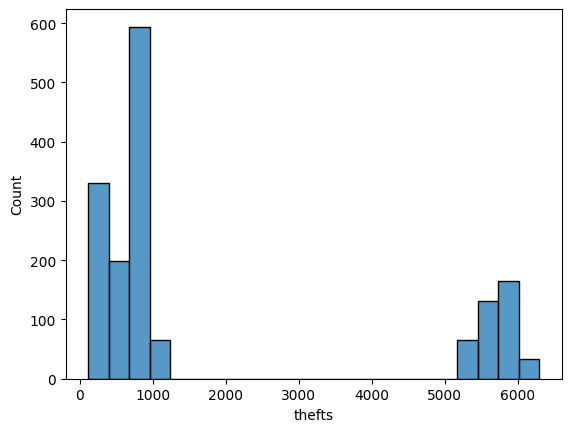

In [58]:
crimes_df = pd.read_csv('/Users/vinggio/pr/workers/MachineLearning/test_ML/Files/crimes_by_state.csv')
thefts_summed = crimes_df['thefts']
sns.histplot(data=crimes_df, x="thefts")

# sns.catplot(data=crimes_df, x="state", y="thefts", hue="state")

## Outcomes
TODO: From the big df, obtain another that contains only the important values i.e state1 = avg selling price 


In [76]:
# data = pd.pivot_table(crimes_df, values='thefts', index=['state'], aggfunc=np.sum)
data = crimes_df.groupby('state')['thefts'].agg(['mean'])

data
data_by_state = crimes_df.groupby('state')
for name, group in crimes_df.groupby('state'):
    print(name, "--", group)
data_by_state['thefts']


aguascalientes --         datetime  thefts  injuries  homicides  property_crimes  kidnappings  \
1488  2013-01-01    5943      1593        261             1971          134   
1489  2013-02-01    5461      1533        294             1982          115   
1490  2013-03-01    5511      1607        363             2040          149   
1491  2013-04-01    5829      1767        281             2218          146   
1492  2013-05-01    5740      1842        337             2224          135   
1493  2013-06-01    5349      1764        289             2028          142   
1494  2013-07-01    5908      1665        229             2043          151   
1495  2013-08-01    6289      1642        275             2084          151   
1496  2013-09-01    5676      1687        216             1955          137   
1497  2013-10-01    5947      1738        261             2120          157   
1498  2013-11-01    5490      1579        288             1981          152   
1499  2013-12-01    5290      1679

In [63]:
price_by_state = prop_sell_df.groupby('state')['price_aprox_local_currency'].agg(['mean', 'std'])
price_by_state['range'] = prop_sell_df.groupby('state')['price_aprox_usd'].apply(lambda x: x.max() - x.min())

price_by_state.reset_index(inplace=True)
price_by_state

,state,mean,std,range
0,Aguascalientes,2.017044e+06,2.976869e+06,1992656.12
1,Baja California,1.886542e+06,6.655135e+06,12260734.65
2,Baja California Sur,4.687950e+06,1.009777e+07,9993676.13
3,Campeche,2.886515e+06,4.180818e+06,1989462.71
4,Chiapas,2.223186e+06,3.400043e+06,6196339.62
5,Chihuahua,2.725647e+06,3.857668e+06,3653948.51
6,Coahuila de Zaragoza,1.579580e+06,1.330468e+06,243861.51
7,Colima,1.933933e+06,4.335204e+06,5994784.04
8,Distrito Federal,5.288377e+06,1.154195e+07,48992633.06
9,Durango,1.600049e+06,2.971231e+06,3418634.92
